<a href="https://colab.research.google.com/github/Nahmadid/Deep_learning/blob/main/HW3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Approximation of Oscillatory function**


Approximate the oscillatory function given by:

\begin{align*}
 5 + \sum_{k=1}^6 \sin(kx), & \text{if } x<0 \\
\cos(10x), & \text{if } x \geq 0
\end{align*}

using tanh and ReLU activation functions in TensorFlow. Compare the results for 40 and 80 data points that are (a) equi-spaced and (b) randomly sampled from a uniform distribution.


The architecture of the neural network is as follows:

Input layer: It has a single input feature.
Hidden layers: There are three hidden layers with 20, 30, and 20 neurons respectively. Each hidden layer uses the ReLU activation function, which is a popular choice for deep neural networks due to its ability to efficiently handle vanishing gradients during backpropagation.
    Output layer: It has a single neuron and no activation function is specified, which indicates that the output is a linear combination of the inputs from the previous layer.

Overall, the architecture of the neural network can be represented as:

Input layer (1) -> Hidden layer (20) -> Hidden layer (30) -> Hidden layer (20) -> Output layer (1)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the oscillatory function
def fun_x(x):
    if x < 0.:
        f = 5.0 + tf.sin(x) + tf.sin(2.*x) + tf.sin(3.*x) + tf.sin(4.*x)+ tf.sin(5.*x)+ tf.sin(6.*x)
    else:
        f = tf.cos(10.*x)
    return f

_____________________


# a) 40  Equi_spaced data points  and ReLU activation function

In [12]:

# Generate equi_spaced training data  40 data points
x_train_40 = tf.linspace(-np.pi, np.pi, 40)

# Calculate the corresponding y-values for the data points
y_train_40 = tf.map_fn(fun_x, x_train_40)


# Define the neural network architecture with ReLU activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(x_train_40, y_train_40, epochs=5000, verbose=0)


# Evaluate the model
x_plot = tf.linspace(-np.pi, np.pi, 100)
y_plot = tf.map_fn(fun_x, x_plot)
y_pred_40 = model.predict(x_plot)


4/4 [==============================] - 0s 3ms/step


_____________________


# a)  80  Equi_spaced data points  and ReLU activation function

In [13]:
# Generate equi_spaced training data 80 data points
x_train_80 = tf.linspace(-np.pi, np.pi, 80)

# Calculate the corresponding y-values for the data points
y_train_80 = tf.map_fn(fun_x, x_train_80)


# Define the neural network architecture with ReLU activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(x_train_80, y_train_80, epochs=5000, verbose=0)


# Evaluate the model
y_pred_80 = model.predict(x_plot)


4/4 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'num_points = 80')

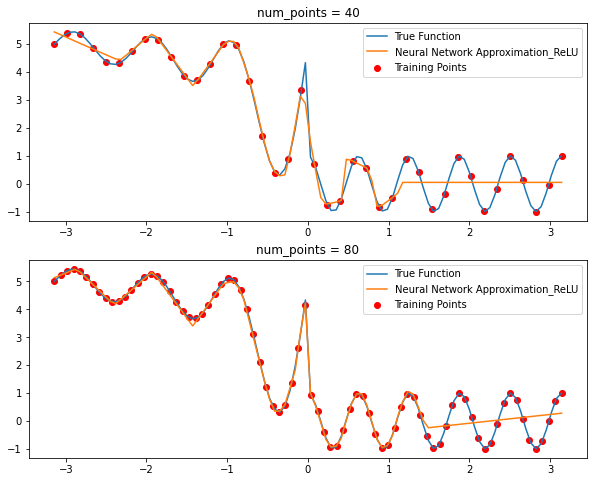

In [16]:
plt.figure(figsize=(10,8))
#Plot the results for num_points = 40
plt.subplot(2,1,1)
plt.plot(x_plot, y_plot, label="True Function")
plt.plot(x_plot, y_pred_40, label="Neural Network Approximation_ReLU")
plt.scatter(x_train_40, y_train_40, color="red", label="Training Points")
plt.legend()
plt.title("num_points = 40")

#Plot the results for num_points = 80
plt.subplot(2,1,2)
plt.plot(x_plot, y_plot, label="True Function")
plt.plot(x_plot, y_pred_80, label="Neural Network Approximation_ReLU")
plt.scatter(x_train_80, y_train_80, color="red", label="Training Points")
plt.legend()
plt.title("num_points = 80")

__________________________________

# a) Equi_spaced data point 40 and 80  and Tanh activation function

In [17]:


# Define the neural network architecture with tanh activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(x_train_40, y_train_40, epochs=5000, verbose=0)


# Evaluate the model
x_plot = tf.linspace(-np.pi, np.pi, 100)
y_plot = tf.map_fn(fun_x, x_plot)
y_pred_40 = model.predict(x_plot)



4/4 [==============================] - 0s 5ms/step


In [18]:

# Define the neural network architecture with tanh activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(x_train_80, y_train_80, epochs=5000, verbose=0)


# Evaluate the model
y_pred_80 = model.predict(x_plot)


4/4 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'num_points = 80')

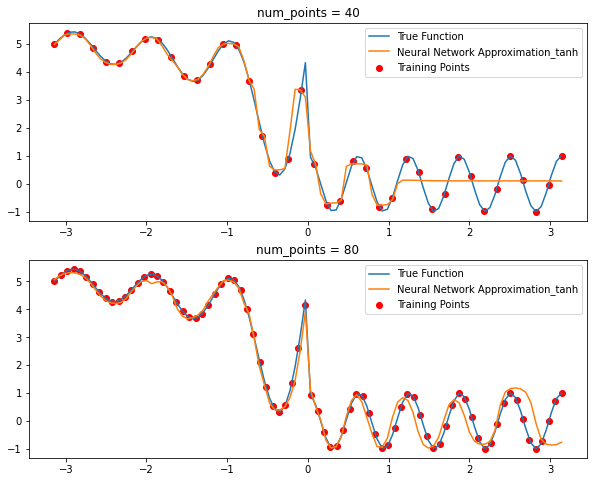

In [19]:
plt.figure(figsize=(10,8))
#Plot the results for num_points = 40
plt.subplot(2,1,1)
plt.plot(x_plot, y_plot, label="True Function")
plt.plot(x_plot, y_pred_40, label="Neural Network Approximation_tanh")
plt.scatter(x_train_40, y_train_40, color="red", label="Training Points")
plt.legend()
plt.title("num_points = 40")

#Plot the results for num_points = 80
plt.subplot(2,1,2)
plt.plot(x_plot, y_plot, label="True Function")
plt.plot(x_plot, y_pred_80, label="Neural Network Approximation_tanh")
plt.scatter(x_train_80, y_train_80, color="red", label="Training Points")
plt.legend()
plt.title("num_points = 80")

____________________________


# b) Randomly sampled from uniform Distribution data points  40 and 80 point and ReLU activation function

data_points = tf.random.uniform(shape, range_min, range_max)



In [25]:
tf.random.set_seed(42)

# Generate 80 random data points from a uniform distribution
x_train_40 = tf.random.uniform(shape=[40, 1], minval=-np.pi, maxval=np.pi)

# Calculate the corresponding y-values for the data points
y_train_40 = tf.map_fn(fun_x, x_train_40)

# Define the neural network architecture with ReLU activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(x_train_40, y_train_40, epochs=5000, verbose=0)



#xplot, y plot , y_pred_40
x_plot = tf.linspace(-np.pi, np.pi, 100)
y_plot = tf.map_fn(fun_x, x_plot)

y_pred_40 = model.predict(x_plot)


4/4 [==============================] - 0s 3ms/step


In [26]:
tf.random.set_seed(42)

# Generate 80 random data points from a uniform distribution
x_train_80 = tf.random.uniform(shape=[80, 1], minval=-np.pi, maxval=np.pi)

# Calculate the corresponding y-values for the data points
y_train_80 = tf.map_fn(fun_x, x_train_80)

# Define the neural network architecture with ReLU activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(x_train_80, y_train_80, epochs=5000, verbose=0)

y_pred_80 = model.predict(x_plot)

4/4 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'num_points = 80  and randome sampled')

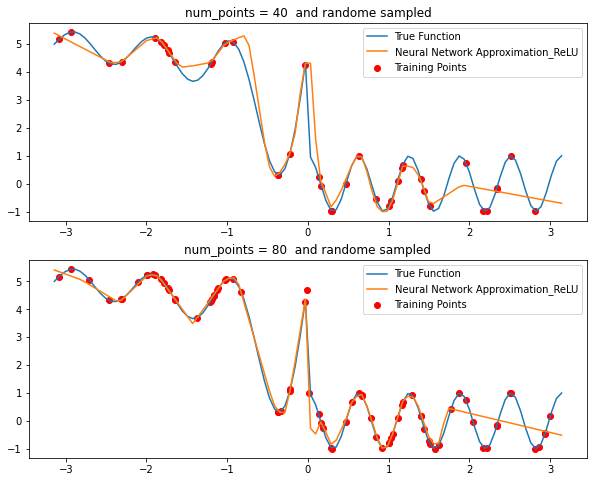

In [27]:
plt.figure(figsize=(10,8))
#Plot the results for num_points = 40
plt.subplot(2,1,1)
plt.plot(x_plot, y_plot, label="True Function")
plt.plot(x_plot, y_pred_40, label="Neural Network Approximation_ReLU")
plt.scatter(x_train_40, y_train_40, color="red", label="Training Points")
plt.legend()
plt.title("num_points = 40  and randome sampled")

#Plot the results for num_points = 80
plt.subplot(2,1,2)
plt.plot(x_plot, y_plot, label="True Function")
plt.plot(x_plot, y_pred_80, label="Neural Network Approximation_ReLU")
plt.scatter(x_train_80, y_train_80, color="red", label="Training Points")
plt.legend()
plt.title("num_points = 80  and randome sampled")

_______________

# b) Randomly sampled from uniform Distribution data points  40 and 80 point and tanh activation function


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the oscillatory function
def fun_x(x):
    if x < 0.:
        f = 5.0 + tf.sin(x) + tf.sin(2.*x) + tf.sin(3.*x) + tf.sin(4.*x)+ tf.sin(5.*x)+ tf.sin(6.*x)
    else:
        f = tf.cos(10.*x)
    return f

tf.random.set_seed(42)

# Generate 80 random data points from a uniform distribution
x_train_40 = tf.random.uniform(shape=[40, 1], minval=-np.pi, maxval=np.pi)

# Calculate the corresponding y-values for the data points
y_train_40 = tf.map_fn(fun_x, x_train_40)

# Define the neural network architecture with ReLU activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(x_train_40, y_train_40, epochs=5000, verbose=0)



#xplot, y plot , y_pred_40
x_plot = tf.linspace(-np.pi, np.pi, 100)
y_plot = tf.map_fn(fun_x, x_plot)

y_pred_40 = model.predict(x_plot)

4/4 [==============================] - 0s 5ms/step


In [4]:
tf.random.set_seed(42)

# Generate 80 random data points from a uniform distribution
x_train_80 = tf.random.uniform(shape=[80, 1], minval=-np.pi, maxval=np.pi)

# Calculate the corresponding y-values for the data points
y_train_80 = tf.map_fn(fun_x, x_train_80)

# Define the neural network architecture with ReLU activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(x_train_80, y_train_80, epochs=5000, verbose=0)

y_pred_80 = model.predict(x_plot)

4/4 [==============================] - 0s 4ms/step


Text(0.5, 1.0, 'num_points = 80  and random sampled')

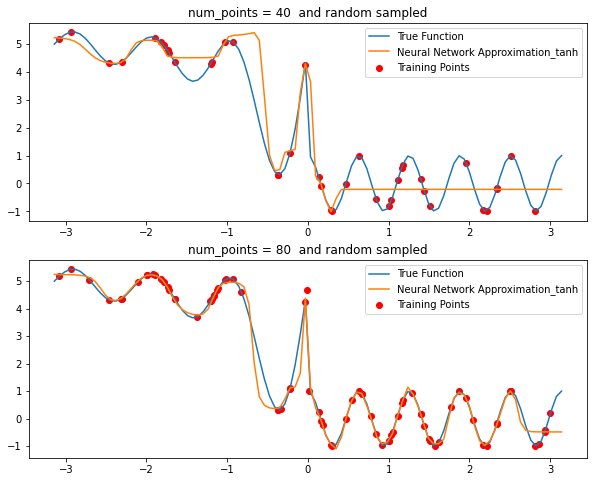

In [5]:
plt.figure(figsize=(10,8))
#Plot the results for num_points = 40
plt.subplot(2,1,1)
plt.plot(x_plot, y_plot, label="True Function")
plt.plot(x_plot, y_pred_40, label="Neural Network Approximation_tanh")
plt.scatter(x_train_40, y_train_40, color="red", label="Training Points")
plt.legend()
plt.title("num_points = 40  and random sampled")

#Plot the results for num_points = 80
plt.subplot(2,1,2)
plt.plot(x_plot, y_plot, label="True Function")
plt.plot(x_plot, y_pred_80, label="Neural Network Approximation_tanh")
plt.scatter(x_train_80, y_train_80, color="red", label="Training Points")
plt.legend()
plt.title("num_points = 80  and random sampled")